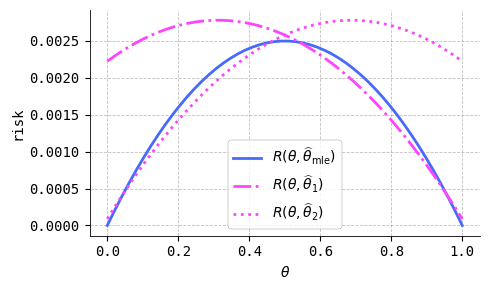

In [71]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
#import matplotlib_inline.backend_inline
import matplotlib.colors as clr
import warnings
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings("ignore")
blue = '#486AFB'
magenta = '#FD46FC'

def risk_mle(theta):
    return theta * (1 - theta) / 100

def risk_1(theta):
    return (25 + 8 * theta * (5 - 8 * theta)) / 11236

def risk_2(theta):
    return (1 + 8 * theta * (11 - 8 * theta)) / 11236

grid  = np.linspace(0, 1)
plt.plot(grid, risk_mle(grid), label='$R(\\theta,\widehat{\\theta}_{\\text{mle}})$')
plt.plot(grid, risk_1(grid), label='$R(\\theta,\widehat{\\theta}_1)$', linestyle='dashdot')
plt.plot(grid, risk_2(grid), color=magenta, label='$R(\\theta,\widehat{\\theta}_2)$', linestyle='dotted')
plt.gcf().set_size_inches(5, 3)
plt.xlabel('$\\theta$')
plt.ylabel('risk')
plt.legend()
plt.tight_layout()

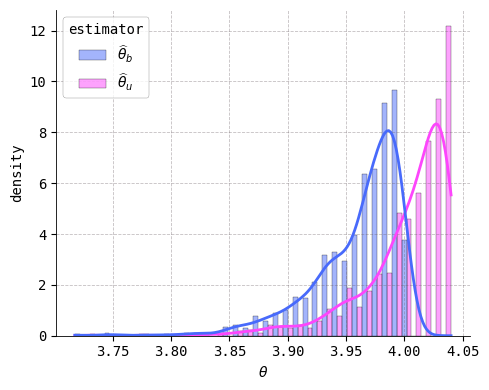

In [76]:
theta = 4
m = 100
simulation_size = 1000

def theta_b(sample):
    return sample.max()

def theta_u(sample):
    return (m + 1) / m * theta_b(sample)

np.random.seed(42)
estimates_b = []
estimates_u = []
for _ in range(simulation_size):
    sample = np.random.uniform(high=theta, size=m)
    estimates_b.append(theta_b(sample))
for _ in range(simulation_size):
    sample = np.random.uniform(high=theta, size=m)
    estimates_u.append(theta_u(sample))
    
estimates = np.concatenate((estimates_b, estimates_u))
labels_b = ['$\\widehat{\\theta}_b$'] * simulation_size
labels_u = ['$\\widehat{\\theta}_u$'] * simulation_size
labels = pd.Series(data=labels_b + labels_u)

ar = np.column_stack(tup=(estimates, labels))
df = pd.DataFrame(data=ar, columns=['estimates', 'estimator'])

sns.histplot(data=df, x='estimates', hue='estimator', multiple='dodge', kde=True, ec='black', stat='density')
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()